# Lecture 6
### Visualization part II (Overlaying Plots and Histograms) and Functions

# Overlaying plots

In [2]:
#: the usual imports
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore') # just for the slides!

import numpy as np
from datascience import *

### Recall the female:male plot from the census
* There are *many* more women than men in old-age!

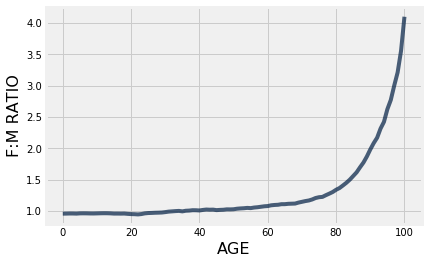

In [8]:
census = (
    Table
    .read_table('./census.csv')
    .relabeled('POPESTIMATE2010', '2010')
    .relabeled('POPESTIMATE2015', '2015')
    .select('SEX', 'AGE', '2010', '2015')
)

female = census.where('SEX', 2).where('AGE', are.not_equal_to(999)).sort('AGE')
male = census.where('SEX', 1).where('AGE', are.not_equal_to(999)).sort('AGE')

ratios = Table().with_columns(
    'AGE', female.column('AGE'),
    'F:M RATIO', female.column('2015') / male.column('2015')
)
ratios.plot('AGE')

### What about absolute numbers?
* Make a new table with columns: `age`, `male population`, `female population`

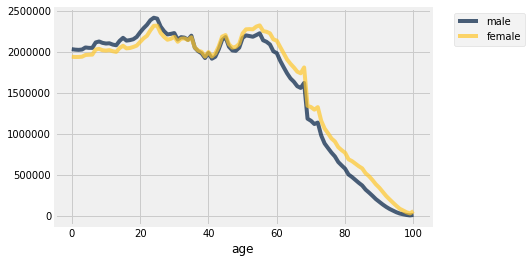

In [9]:
Table().with_columns(
    ('age', male.column('AGE')),
    ('male', male.column('2015')),
    ('female', female.column('2015'))
).plot('age')

### To plot multiple line graphs at once:
* Drop all extraneous columns from your table.
* Specify the column for the x-axis in the `.plot(col)` method.
* `plot` will plot other columns against a shared y-axis.

### Plot the overall population by age for both 2010 and 2015
* Use both sexes
* Don't forget `AGE=999`!

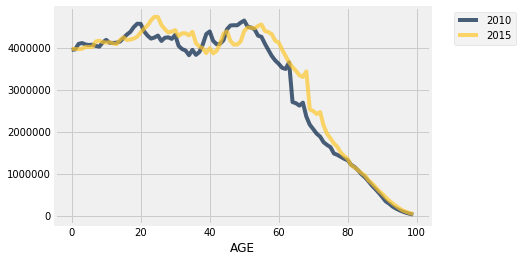

In [10]:
# plot overall population by age for both 2010 and 2015
census.where('SEX', 0).drop('SEX').where('AGE', are.below(100)).plot('AGE')

## Bar plots work similarly

* Drop all extraneous columns from your table.
* Specify the column for the x-axis in the `.plot(col)` method.
* `plot` will plot other columns against a shared y-axis.

In [128]:
# plot 2010/2015 totals by SEX

# Histograms

### Visualizing distributions of numerical values

## Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Bins are definted by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin

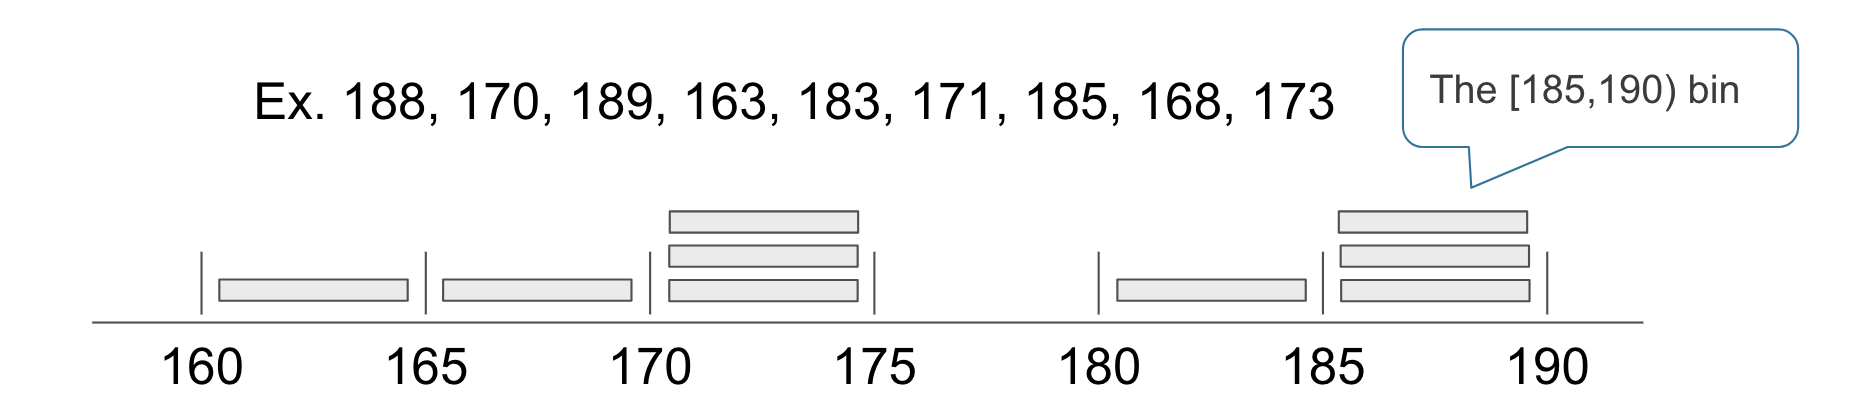    

### Top Movies
* Read `top_movies.csv`
* Create column `Age` that denotes the age of a movie in years, from 2018

In [5]:
top_movies = Table.read_table('top_movies.csv')
aged = top_movies.with_column('Age', 2018 - top_movies.column('Year'))

### Categorical distribution of `Age`
Recall `.group("Age")` calculates the categorical distribution of the column `Age`.

In [8]:
aged.group("Age")

Age,count
3,6
4,3
5,4
6,5
7,2
8,4
9,6
10,3
11,5
12,3


### Numerical distribution of `Age`
The method `.bin(col, bins=arr)` calculates the distribution of values of `col` in each bin in the array `arr`.
* Bins need not be evenly space (e.g. [0, 5, 10, 20, 40, 65, 100])
* Last row of table represents the right endpoint of the last bin.

In [30]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40, 65, 100))

bin,Age count
0,9
5,21
10,43
20,59
40,53
65,15
100,0


### Binning may not capture all the data
What happens if the right endpoint is `Age = 40`?
* May not capture all the data!

In [31]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40))

bin,Age count
0,9
5,21
10,43
20,62
40,0


### Binning may not capture all the data
Question: Why did the count corresponding to 20 increase?

In [34]:
aged.where('Age', 40)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Grease,Paramount,188755690,669632000,1978,40
National Lampoon's Animal House,Universal,141600000,521045300,1978,40
Superman,Warner Bros.,134218018,499015700,1978,40


Answer: bins contain the *final* right endpoint

### Default binning
Evenly spaced with 10 bins

In [38]:
bins = aged.bin('Age').column('bin')
dist = np.diff(bins)
num = bins.size

print(bins, dist, num, sep='\n')

[ 3.  12.4 21.8 31.2 40.6 50.  59.4 68.8 78.2 87.6 97. ]
[9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4]
11


### Create your own evenly spaced bins with `np.arange`
* To create `N` evenly spaced bins of an array `a`:
```
np.arange(a.min(), a.max(), (a.max() - a.min()) / (N + 1))
```
* create 5 bins for `Age` containing all the data.

In [46]:
ages = aged.column('Age')
bins = np.arange(ages.min(), ages.max(), (ages.max() - ages.min()) / (5 + 1))
aged.bin('Age', bins=bins)

bin,Age count
3,69
18.6667,50
34.3333,40
50,29
65.6667,11
81.3333,0


## Histogram
A chart displaying the distribution of numerical values using bins

### Plot a histogram of movie ages
* change to custom bins `np.arange(0, 101, 20)`; use `unit=year`.
* try `normed=False` for plot of counts. Why are the default units so strange?

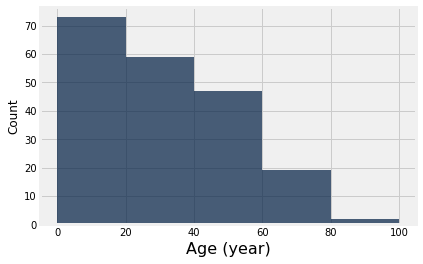

In [54]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year', normed=False)

### Discussion Question

What should happen to our histogram if we combine the two bins [20, 40) and [40, 60) into one large bin [20, 60)?

Option | Answer
--- | ---
A. | The new histogram should have four bars of equal width.
B. | The height of the bar for bin [20, 60) should be the sum of the heights of the bars for bins [20, 40) and [40, 60).
C. | The area of the bar for bin [20, 60) should be the sum of the areas of the bars for bins [20, 40) and [40, 60).
D. | More than one of the above.


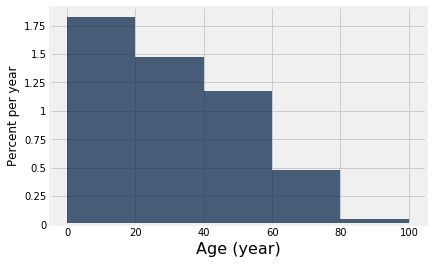

In [61]:
aged.hist('Age', bins=[0,20,40,60,80,100], unit='year')

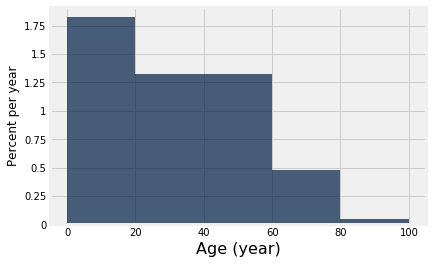

In [62]:
aged.hist('Age', bins=[0,20,60,80,100], unit='year')

# The Density Scale

### Histogram Axes

By default, `hist` uses a scale (`normed=True`) that ensures the area of the chart sums to 100%
* The horizontal axis is a number line (e.g. years)
* The vertical axis is a rate (e.g. percent per year)
* The area of the bar is a percentage of the whole

### Varying histogram bin sizes: how the y-axis changes

* Try varying number of bins: 1, 2, 5, 10, 20, 50
* Watch the y-axis and the total area

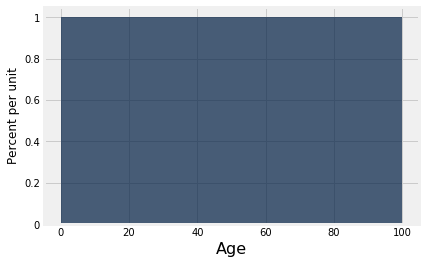

In [67]:
aged.hist('Age', bins=[0 ,100])

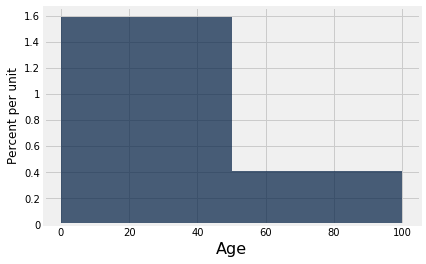

In [66]:
aged.hist('Age', bins=[0, 50 ,100])

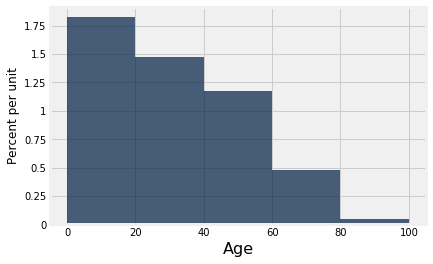

In [68]:
aged.hist('Age', bins=[0, 20, 40, 60, 80 ,100])

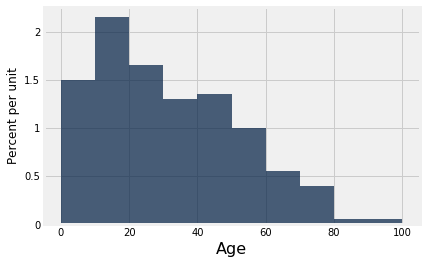

In [69]:
aged.hist('Age', bins=np.arange(0,101,10))

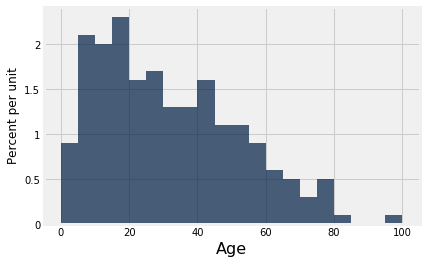

In [70]:
aged.hist('Age', bins=np.arange(0,101,5))

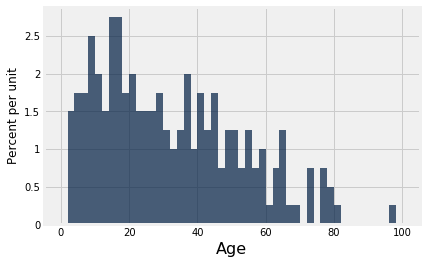

In [71]:
aged.hist('Age', bins=np.arange(0,101,2))

### How to calculate height

The $[20, 40)$ bin contains 59 out of 200 movies.
* $59/200 = 29.5%$
* The bin is $40 - 20 = 20$ years wide.

$$ \rm{Height\ of\ bar} = \frac{\rm{Area}}{\rm{Width}} = \frac{29.5 \%}{20\rm{\ years}} = 1.475\%\rm{\ per\ year} $$


### Height measures density

$$ \rm{Height} = \frac{\% \rm{\ in\ bin}}{\rm{width\ of\ bin}}$$

* The height measures the percent of data in the bin **relative to the amount of space in the bin**.
* Height measures crowdedness, or **density**.

### Discussion Question: Combining Bins

Suppose we combine the two bins [20, 40) and [40, 60) into one large bin [20, 60). What is the density of the new bin?

Option|Answer
---|---
A. | The new bin has about twice as many movies as each original bin, so it is about twice as dense as each original bin.
B. | The new bin is about twice as big as each original bin, so it is about half as dense as each original bin.
C. | The new bin has about twice as many movies and is twice as big as each original bin, so it is about the same density as each original bin.

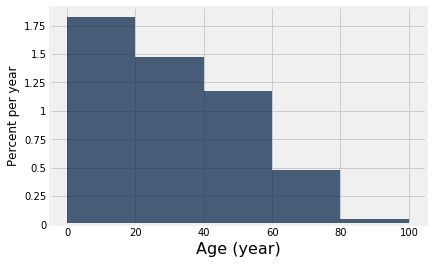

In [72]:
aged.hist('Age', bins=[0,20,40,60,80,100], unit='year')

### Area measures percentages

How many individual are in the bin?

* Area of bin * total number of individuals

# Chart Types

## Bar Charts vs. Histograms

Bar Chart | Histogram
---|---
1 categorical axis & 1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, widths and spacing | Horizontal axis is numerical and to scale
For distributions, height of bars are proportional to the percent of individuals | Height measures density; areas are proportional to the percent of individuals

# Overlaid Histograms

For visually comparing two populations

Read in `galton.csv` and select the heights, in inches, of the son, father, and mother.

In [76]:
heights = Table.read_table('galton.csv').select('childHeight', 'father', 'mother').relabeled('childHeight', 'son')
heights

son,father,mother
73.2,78.5,67
69.2,78.5,67
69,78.5,67
69,78.5,67
73.5,75.5,66.5
72.5,75.5,66.5
65.5,75.5,66.5
65.5,75.5,66.5
71,75,64
68,75,64


### Plot histograms of `son`, `father`, and `mother` in one plot

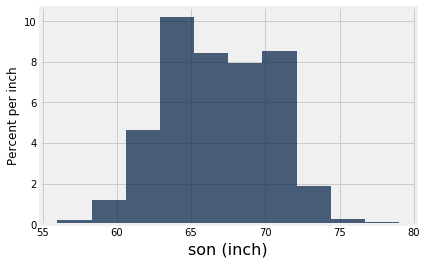

In [81]:
heights.hist('son', unit='inch')

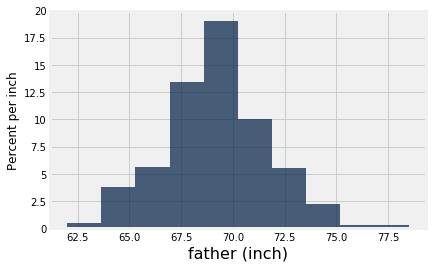

In [78]:
heights.hist('father', unit='inch')

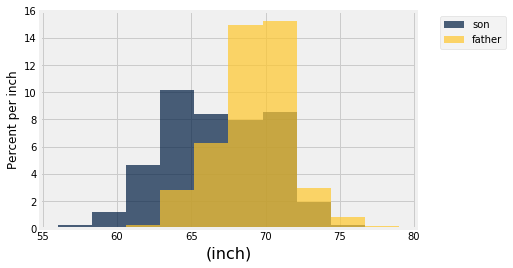

In [79]:
heights.hist('son', 'father', unit='inch')

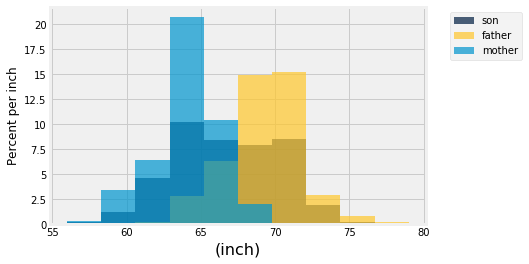

In [80]:
heights.hist('son', 'father', 'mother', unit='inch')

### Scatterplot is better
* In the histogram, you can't tell which father/mother goes with which son

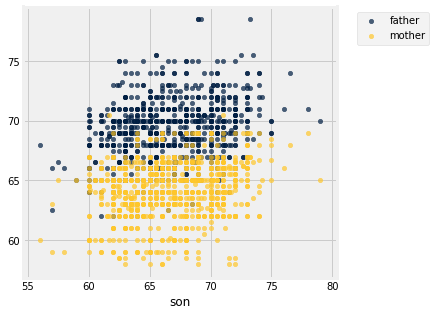

In [82]:
heights.scatter('son')

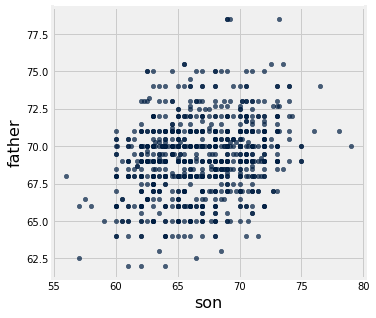

In [83]:
heights.scatter('son', 'father')

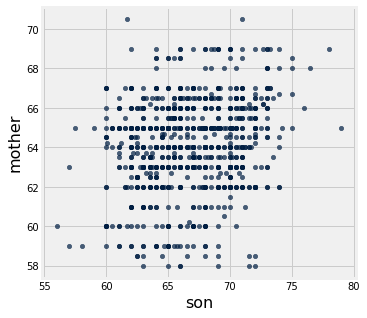

In [84]:
heights.scatter('son', 'mother')

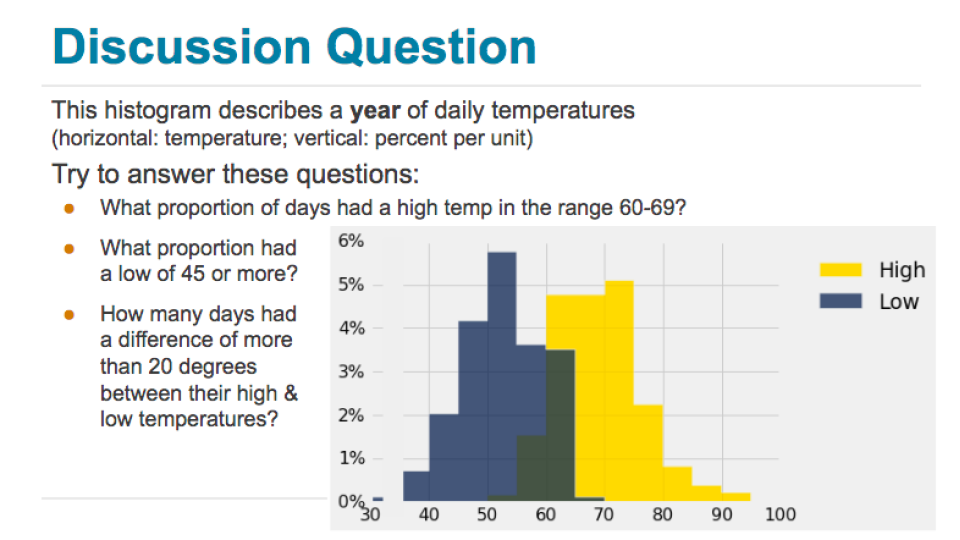

# Functions

## Defining functions
* We've learned a lot of table operations.
* So far, we've been restricted to using existing functions.
    - What if we need to clean a column with specialized logic? (As in Little Women analysis).
    - What if we want to understand the distribution of a custom measurement, derived from existing columns?

### `def` statements define functions
* User-defined functions give names to blocks of code

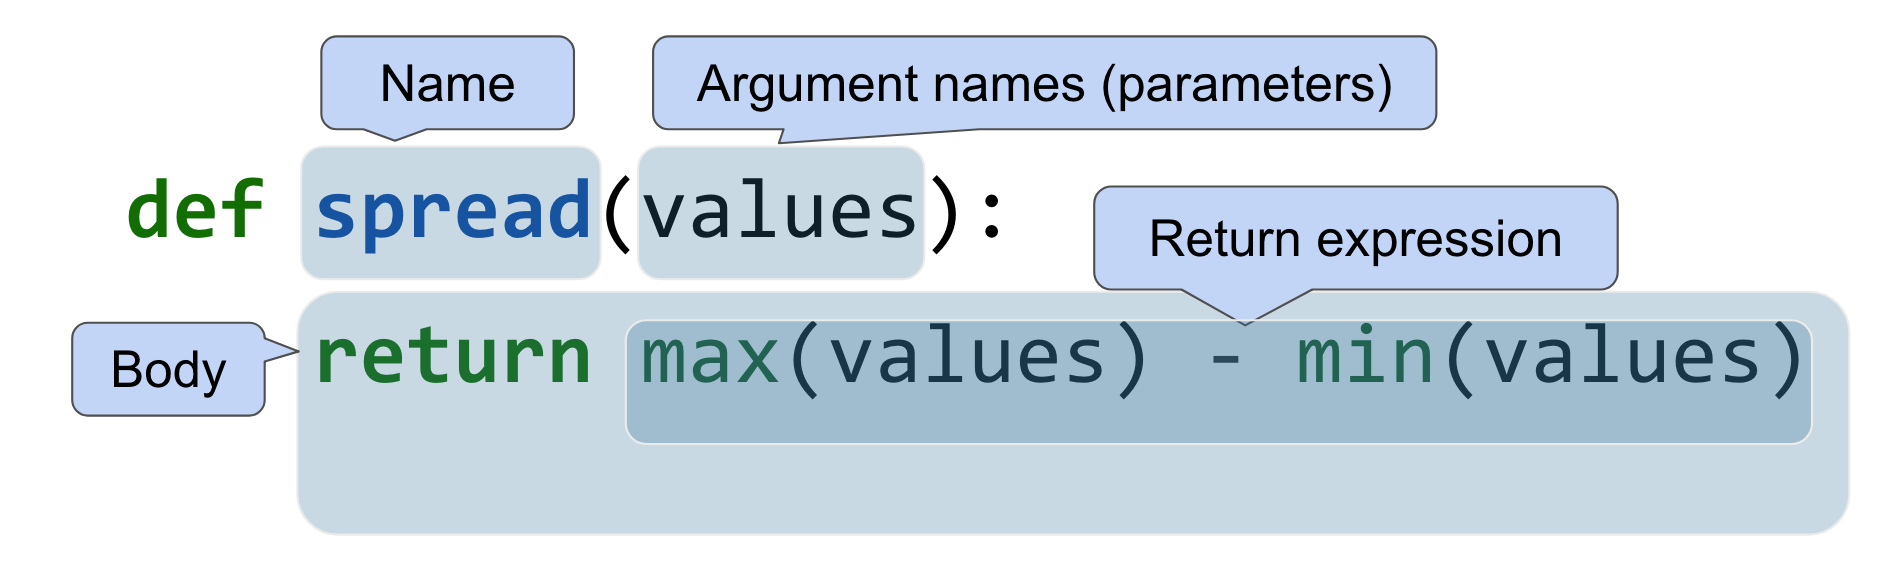

### Create a function that converts Celsius to Farenheit
```
def celsius2farenheit(celsius):
    return (9 / 5) * celsius + 32
```
* scale by 9/5 and add 32
* note: `celsius`, as seen in the function, only exists inside the function!

In [85]:
def celsius2farenheit(x):
    return (9 / 5) * x + 32

In [90]:
#: look at celcius / does it exist after evaluating the function
celsius = 3
celsius2farenheit(2)
celsius

3

### Discussion Question

```
def f(s):
    return np.round(s / sum(s) * 100, 2)
```

Option| What does the function do?| What kind of input does it take?| What output will it give?
---|---|---|---
A| Computes average | array of numbers | one number
B| Computes average | one number | one number
C| Computes percents | array of numbers | array of numbers
D| Computes percents | array of numbers| one number
E| None of the above||

* What's a reasonable name?

### Example: counts to percent

Create a function that converts an array of counts to percentages of the total
* include docstrings, second (optional) arguments

In [98]:
def percents(counts):
    ''' Converts counts to percents out of the total'''
    counts = np.array(counts)  # make sure the container is an array
    total = sum(counts)
    return np.round(counts / total * 100)

percents([1,2,3])

array([17., 33., 50.])

In [97]:
help(percents)

Help on function percents in module __main__:

percents(counts, decimal_places=2)
    Converts counts to percents out of the total



### Example: counts to percent
* Add an argument for decimal places

In [100]:
def percents(counts, decimal_places):
    ''' Converts counts to percents out of the total'''
    counts = np.array(counts)  # make sure the container is an array
    total = sum(counts)
    return np.round(counts / total * 100, decimal_places)

percents([1,2,3], 2)

array([16.67, 33.33, 50.  ])

### Example: counts to percent
* Add a default value for decimal places

In [101]:
def percents(counts, decimal_places=2):
    ''' Converts counts to percents out of the total'''
    counts = np.array(counts)  # make sure the container is an array
    total = sum(counts)
    return np.round(counts / total * 100, decimal_places)

percents([1,2,3])

array([16.67, 33.33, 50.  ])

In [102]:
percents([1,2,3], decimal_places=6)

array([16.666667, 33.333333, 50.      ])